In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]
data_folder = "../data/processed/covid/"

In [2]:
target = pd.read_csv(data_folder+"target_country_encode.csv", index_col='record_id')
policy = pd.read_csv(data_folder+"policy_data.csv", index_col='record_id', 
                     usecols=['record_id', 'date_announced', 'domestic_policy'], parse_dates=['date_announced'])

target = target.join(policy[['date_announced', 'domestic_policy']], on='record_id', how='inner')

grp_m = pd.Grouper(key='date_announced', freq='M')

In [79]:
tg = target.loc[(target.domestic_policy==False)].drop('domestic_policy', axis=1)
tg = tg.loc[tg.date_announced < pd.Timestamp('2021-01-01')]

In [80]:
def v(df):
    df = df.drop('date_announced', axis=1)
    df = df.loc[df.any(axis=1)]
    return pd.Series(df.sum()/len(df))
tg = tg.groupby(grp_m).apply(v)

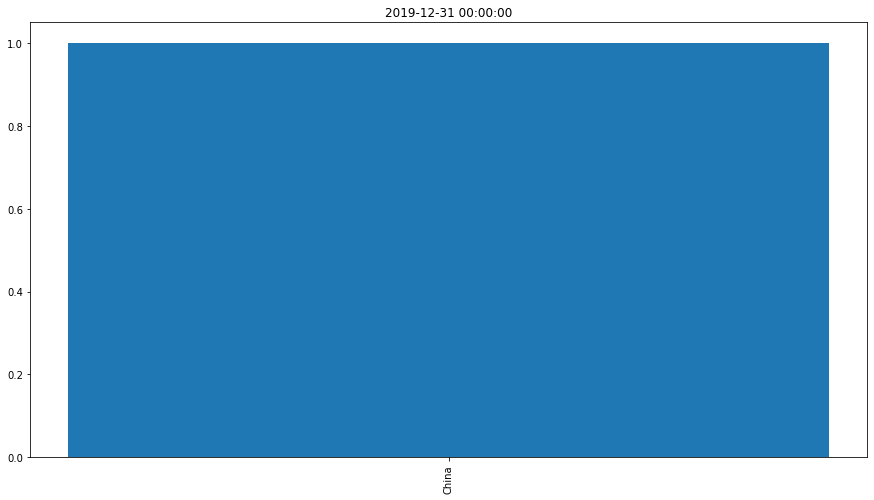

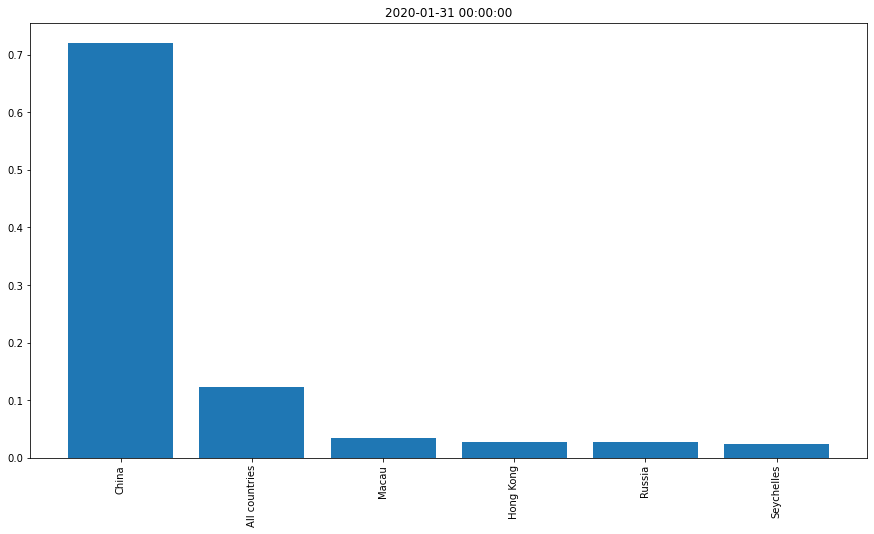

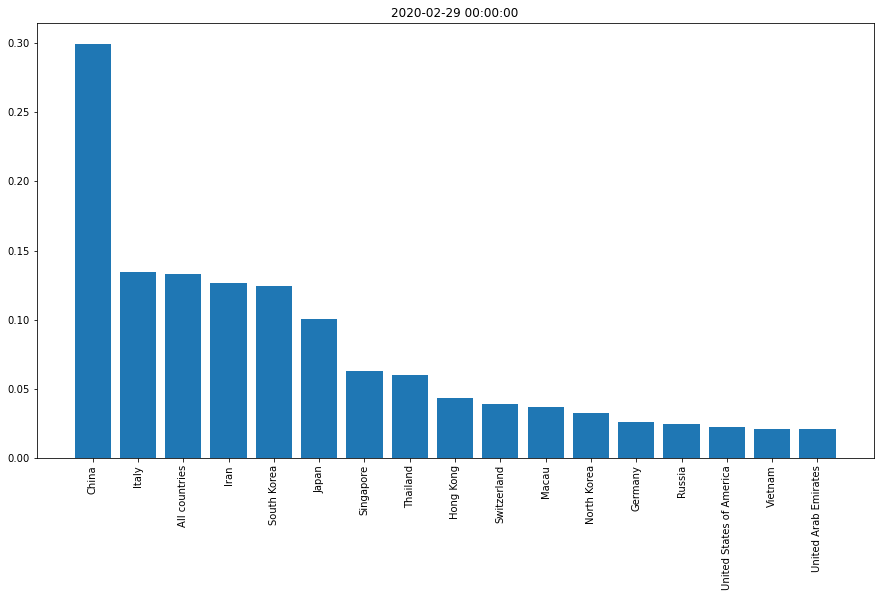

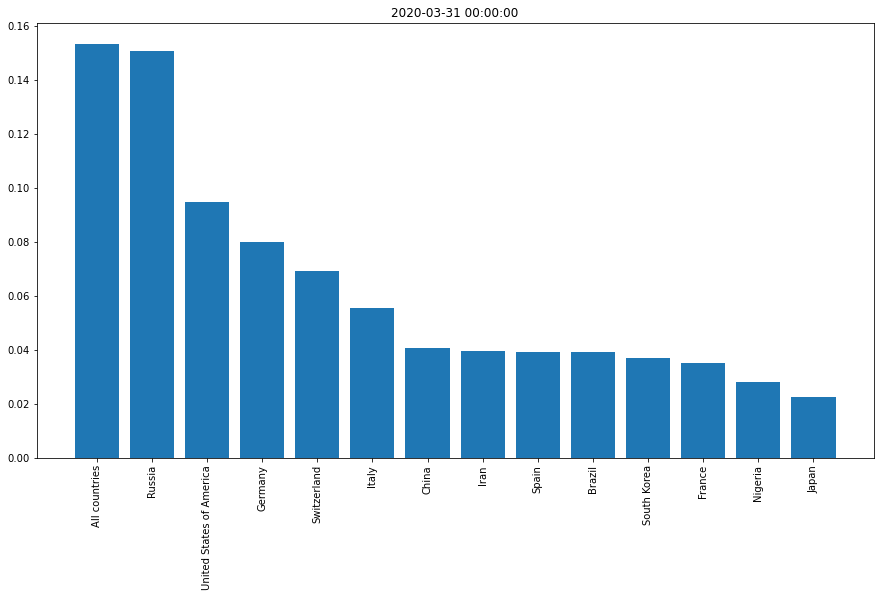

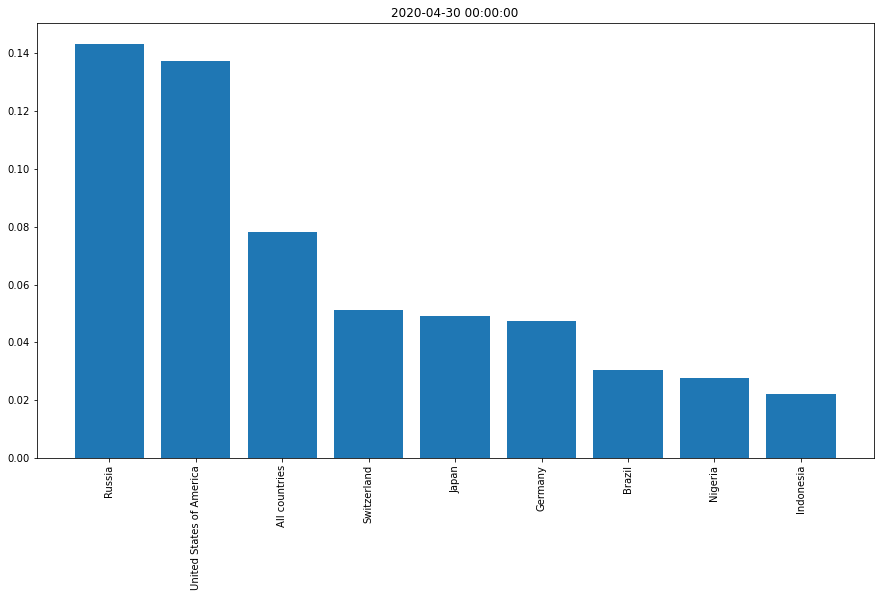

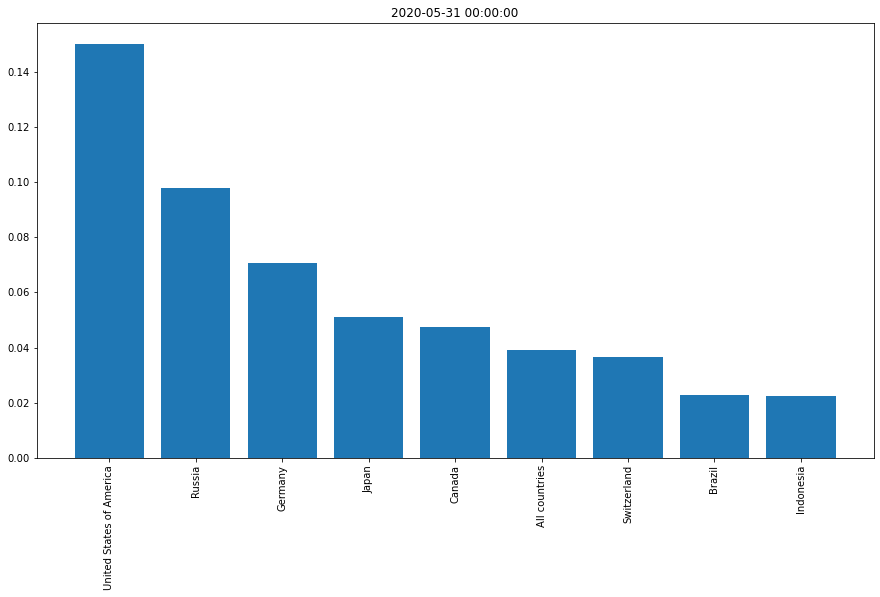

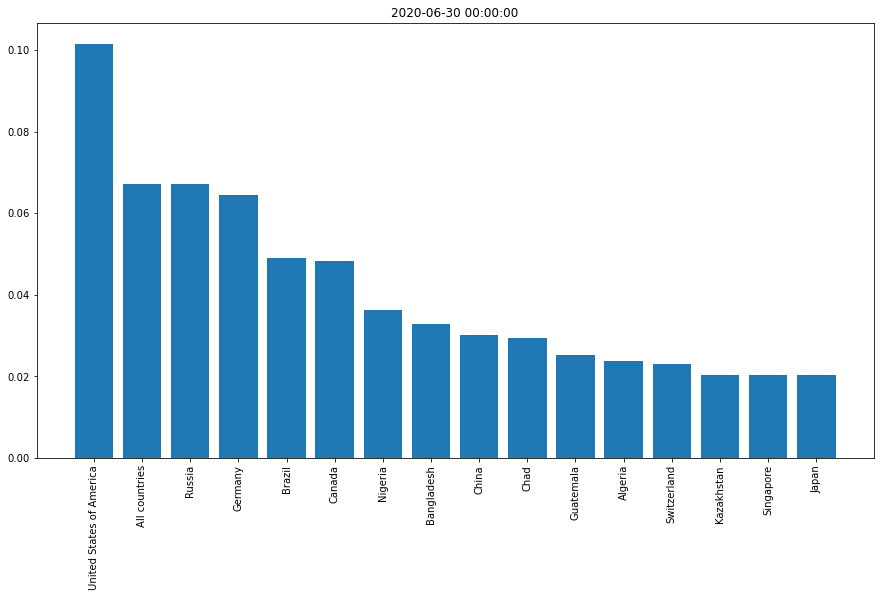

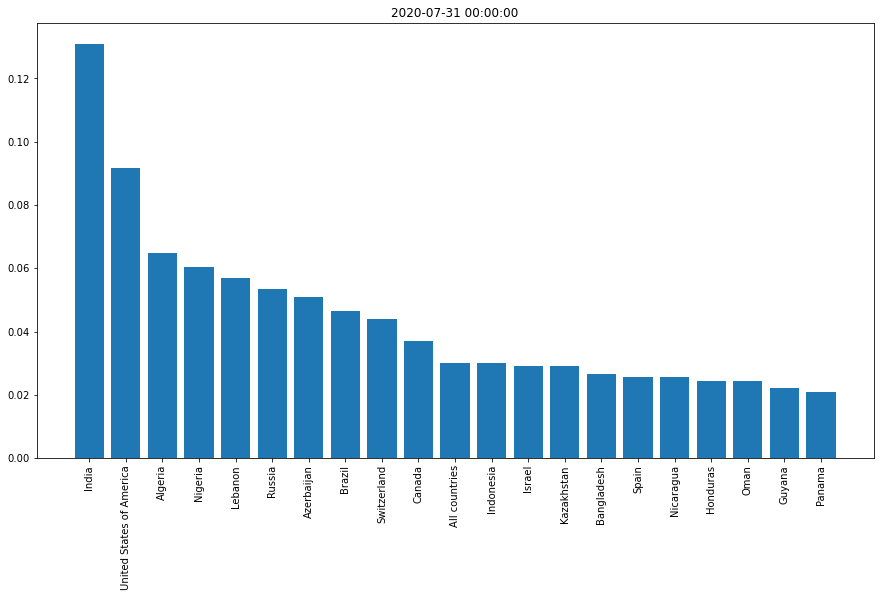

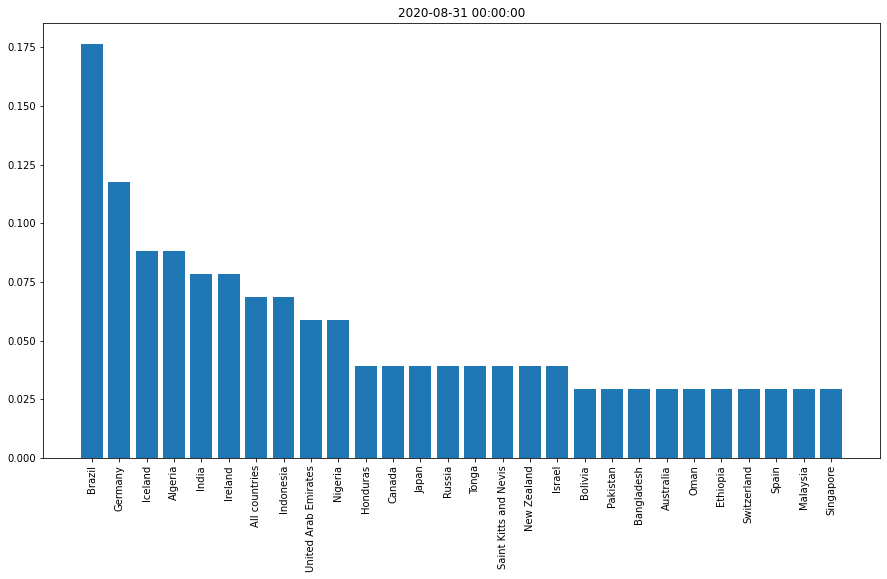

In [81]:
for i, t in tg.iterrows():
    d = t[t>0.02].sort_values(ascending=False)
    if len(d) > 0:
        plt.xticks(rotation=90)
        plt.title(i)
        plt.bar(d.index, d)
        plt.show()